## 2.  Predicting Appliance Energy Usage using Linear Regression

#### a. Train a standard linear regression model only on the training data. What are the RMSE and R2 on the training set, validation set, and test set?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_train = 'train.csv'
file_valid = 'validation.csv'
file_test = 'test.csv'

In [2]:
# Read data; use datetime column as row label
df_train = pd.read_csv(file_train, index_col=0)
df_valid = pd.read_csv(file_valid, index_col=0)
df_test = pd.read_csv(file_test, index_col=0)

df_train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,...,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.00000
mean,98.509172,5.327861,20.705134,40.306429,19.335261,40.362503,20.812207,40.247603,19.522667,39.553929,...,20.709721,43.916035,17.915381,42.233940,4.391101,756.003811,84.081129,4.516064,39.448819,1.74520
std,108.937504,9.231654,1.236850,3.908087,1.456727,3.235719,1.180006,3.497662,1.428879,4.846758,...,1.585853,5.833029,1.035449,4.320856,3.677116,8.951456,11.770324,2.726801,13.603770,3.68758
min,10.000000,0.000000,16.790000,31.426667,16.100000,30.160000,17.200000,32.626667,15.100000,30.723333,...,16.306667,29.600000,14.890000,33.193333,-5.000000,729.300000,45.000000,0.000000,1.000000,-6.60000
25%,50.000000,0.000000,19.890000,37.090000,18.290000,38.146250,20.100000,37.200000,18.700000,35.352500,...,19.725000,39.400000,17.290000,38.767083,1.880000,749.800000,77.666667,2.000000,28.166667,-0.70000
50%,60.000000,0.000000,20.790000,39.933333,19.323333,40.326667,20.790000,39.963333,19.600000,38.466667,...,20.790000,43.790000,18.000000,41.163333,4.400000,757.266667,87.833333,4.000000,40.000000,1.45000
75%,100.000000,10.000000,21.500000,43.500000,20.356667,42.852500,21.600000,43.530000,20.500000,43.650833,...,21.823333,48.818056,18.550000,45.933333,7.000000,763.300000,93.000000,6.166667,47.916667,3.90000
max,1080.000000,70.000000,24.100000,63.360000,23.600000,50.260000,25.500000,50.163333,23.760000,51.090000,...,25.200000,58.780000,20.133333,53.326667,13.100000,772.300000,100.000000,14.000000,65.000000,10.70000


In [3]:
# Prepare data
X_train_orgn = df_train.drop(columns='Appliances')
y_train = df_train['Appliances']
X_valid_orgn = df_valid.drop(columns='Appliances')
y_valid = df_valid['Appliances']
X_test_orgn = df_test.drop(columns='Appliances')
y_test = df_test['Appliances']

In [4]:
# standardize data
X_train_mean = np.mean(X_train_orgn, axis=0)
X_train_std = np.std(X_train_orgn, axis=0)

X_train = (X_train_orgn - X_train_mean) / X_train_std
X_valid = (X_valid_orgn - X_train_mean) / X_train_std
X_test = (X_test_orgn - X_train_mean) / X_train_std

In [5]:
# Train linear regression model
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

98.50917198744466
[ 22.99877096 -15.62031492  43.41595314 -15.34416963 -60.2984271
  26.48600873  53.75696621  -2.0455629   -7.56353852  -0.66715067
  -2.22350892  21.77916936  -1.45668738   1.45852307   2.29692828
   3.91506798 -25.79423406  -1.06991165 -23.32852508 -67.41823365
   4.0431759  -28.50354259   0.35195723   3.18806125  63.36974119]


/Users/liyanxu/VirtualEnv/playground/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [6]:
# Define RMSE
def rmse(lm, X, y):
    return np.sqrt(np.mean((lm.predict(X) - y)**2))

In [7]:
# Define R Squared
def r_squared(lm, X, y):
    return 1 - np.sum((y - lm.predict(X))**2) / np.sum((y - np.mean(y))**2)

In [8]:
# Compute RMSE and R Squared scores
rmse_train = rmse(lm, X_train, y_train)
r2_train = r_squared(lm, X_train, y_train)
rmse_valid = rmse(lm, X_valid, y_valid)
r2_valid = r_squared(lm, X_valid, y_valid)
rmse_test = rmse(lm, X_test, y_test)
r2_test = r_squared(lm, X_test, y_test)

# Print out scores
scores = pd.DataFrame([[rmse_train, r2_train], [rmse_valid, r2_valid], [rmse_test, r2_test]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores

,RMSE,R Squared
train,98.235447,0.186747
validation,97.536065,0.002646
test,100.041271,-0.211952


#### b. Train a standard linear regression model using training and validation together. What are the RMSE and R2 on the training set, validation set, and test set? How does this compare to the previous part? And what do the numbers suggest?

In [9]:
# Prepare data
X_train_b = np.vstack((X_train, X_valid))
y_train_b = np.hstack((y_train, y_valid))

In [10]:
# Train linear regression model
lm.fit(X_train_b, y_train_b)

print(lm.intercept_)
print(lm.coef_)

98.55118784639768
[ 19.41224562   0.18935738  54.35508986 -27.69159799 -44.9066407
  31.07153158  30.22974575  -5.3329941   -7.83800175  -1.87858817
   1.10357652  35.35137898   7.08622652   1.63119782  -5.11613172
  12.51145628 -33.36604063 -13.72152823  -4.26741111 -43.41612964
   1.18551315 -11.89760342   2.29445422   2.63160099  21.81484108]


In [11]:
# Compute RMSE and R Squared scores
rmse_train = rmse(lm, X_train, y_train)
r2_train = r_squared(lm, X_train, y_train)
rmse_valid = rmse(lm, X_valid, y_valid)
r2_valid = r_squared(lm, X_valid, y_valid)
rmse_test = rmse(lm, X_test, y_test)
r2_test = r_squared(lm, X_test, y_test)

# Print out scores
scores = pd.DataFrame([[rmse_train, r2_train], [rmse_valid, r2_valid], [rmse_test, r2_test]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores

,RMSE,R Squared
train,99.388509,0.167544
validation,88.702055,0.175128
test,86.406722,0.095888


The RMSE scores for validation and test data are lower, and the R Squared scores for valdiation and test data are higher, which means the linear regression model overall predicts better results.
Also the RMSE score for training data is slightly higher, and the R Squared score for training data is slightly lower.

It suggests that
* In question a, we overfit the model towards training set, which doesn't generalize enough to overall data. In question b, we add more data to training set, which causes RMSE higher for original training set, but lower for overall dataset, therefore it yeilds better prediction. We should try to avoid overfitting.
* Adding more training data is helpful to reduce overfitting and yields better results.

#### c. Train ridge regression and lasso regression only on the training data. You will want to consider a range of parameter values (λ) to find the optimal regularization parameter that gives you the lowest RMSE or R2 on the validation dataset. Report (using a table) the RMSE and R2 for training, validation, and test for all the different (λ) values you tried.

In [12]:
# Define function to train with a list of lambdas
def train_with_lambdas(lm, lambdas, X_train, y_train, X_valid, y_valid, X_test, y_test):
    rmses = []
    r2s = []
    for lambda_ in lambdas:
        lm.set_params(alpha=lambda_)
        lm.fit(X_train, y_train)
        rmses.append([rmse(lm, X_train, y_train),
                    rmse(lm, X_valid, y_valid),
                    rmse(lm, X_test, y_test)])
        r2s.append([r_squared(lm, X_train, y_train),
                  r_squared(lm, X_valid, y_valid),
                  r_squared(lm, X_test, y_test)])
    return rmses, r2s

In [13]:
# Train ridge linear regression model
lm_ridge = linear_model.Ridge()
lambdas_ridge = np.linspace(0, 10000, 100)

rmses_ridge, r2s_ridge = train_with_lambdas(lm_ridge, lambdas_ridge,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [14]:
# Train lasso linear regression model
lm_lasso = linear_model.Lasso()
lambdas_lasso = np.linspace(0.1, 10, 100)

rmses_lasso, r2s_lasso = train_with_lambdas(lm_lasso, lambdas_lasso,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

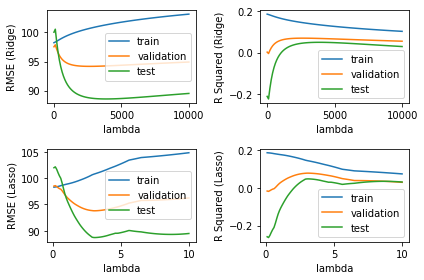

In [15]:
# Plot scores for ridge
fig, (axs_ridge, axs_lasso) = plt.subplots(2, 2)

lineObjects_ridge_rmse = axs_ridge[0].plot(lambdas_ridge, rmses_ridge)
axs_ridge[0].set_xlabel('lambda')
axs_ridge[0].set_ylabel('RMSE (Ridge)')
axs_ridge[0].legend(lineObjects_ridge_rmse, ['train', 'validation', 'test'])

lineObjects_ridge_r2 = axs_ridge[1].plot(lambdas_ridge, r2s_ridge)
axs_ridge[1].set_xlabel('lambda')
axs_ridge[1].set_ylabel('R Squared (Ridge)')
axs_ridge[1].legend(lineObjects_ridge_r2, ['train', 'validation', 'test'])

lineObjects_lasso_rmse = axs_lasso[0].plot(lambdas_lasso, rmses_lasso)
axs_lasso[0].set_xlabel('lambda')
axs_lasso[0].set_ylabel('RMSE (Lasso)')
axs_lasso[0].legend(lineObjects_lasso_rmse, ['train', 'validation', 'test'])

lineObjects_lasso_r2 = axs_lasso[1].plot(lambdas_lasso, r2s_lasso)
axs_lasso[1].set_xlabel('lambda')
axs_lasso[1].set_ylabel('R Squared (Lasso)')
axs_lasso[1].legend(lineObjects_lasso_r2, ['train', 'validation', 'test'])

plt.tight_layout()
plt.show()

We can see from the plot that,
* There exists a $\lambda$ for **ridge** in $(2000, 5000)$ that generates minimum RMSE scores and maximum R Squared scores (for **standardized** validation and test data).
* There exists a $\lambda$ for **lasso** in $(3, 4)$ that generates minimum RMSE scores and maximum R Squared scores (for **standardized** validation and test data).

Show tables with tighter bound of $\lambda$ to pick the optimal regularization parameter.

In [16]:
# Re-train ridge linear regression model with tighter lambda bound
lambdas_ridge = np.linspace(2000, 5000, 20)

rmses_ridge, r2s_ridge = train_with_lambdas(lm_ridge, lambdas_ridge,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [17]:
# Show RMSE scores for ridge
df_ridge_rmses = pd.DataFrame(np.array(rmses_ridge).T,
                        ['train', 'validation', 'test'],
                        lambdas_ridge)
df_ridge_rmses

,2000.0,2157.8947368421054,2315.7894736842104,2473.684210526316,2631.578947368421,2789.4736842105262,2947.3684210526317,3105.2631578947367,3263.157894736842,3421.0526315789475,3578.9473684210525,3736.842105263158,3894.7368421052633,4052.6315789473683,4210.526315789473,4368.421052631578,4526.315789473684,4684.21052631579,4842.105263157895,5000.0
train,100.299077,100.404846,100.505703,100.602134,100.694555,100.783328,100.868767,100.951146,101.030706,101.107661,101.182198,101.254485,101.324671,101.392890,101.459262,101.523897,101.586893,101.648339,101.708316,101.766900
validation,94.211559,94.192197,94.179900,94.173246,94.171141,94.172729,94.177337,94.184428,94.193569,94.204410,94.216665,94.230098,94.244513,94.259745,94.275659,94.292138,94.309084,94.326412,94.344053,94.361943
test,89.117517,88.994336,88.894365,88.813374,88.748075,88.695879,88.654719,88.622928,88.599145,88.582249,88.571308,88.565539,88.564280,88.566968,88.573120,88.582318,88.594199,88.608448,88.624788,88.642973


In [18]:
# Show R Squared scores for ridge
df_ridge_r2s = pd.DataFrame(np.array(r2s_ridge).T,
                        ['train', 'validation', 'test'],
                        lambdas_ridge)
df_ridge_r2s

,2000.0,2157.8947368421054,2315.7894736842104,2473.684210526316,2631.578947368421,2789.4736842105262,2947.3684210526317,3105.2631578947367,3263.157894736842,3421.0526315789475,3578.9473684210525,3736.842105263158,3894.7368421052633,4052.6315789473683,4210.526315789473,4368.421052631578,4526.315789473684,4684.21052631579,4842.105263157895,5000.0
train,0.152220,0.150431,0.148724,0.147089,0.145521,0.144014,0.142562,0.141161,0.139807,0.138496,0.137225,0.135992,0.134794,0.133628,0.132494,0.131388,0.130310,0.129258,0.128230,0.127225
validation,0.069476,0.069859,0.070102,0.070233,0.070275,0.070243,0.070152,0.070012,0.069832,0.069618,0.069375,0.069110,0.068825,0.068524,0.068210,0.067884,0.067549,0.067206,0.066857,0.066503
test,0.038270,0.040927,0.043080,0.044823,0.046227,0.047349,0.048233,0.048915,0.049426,0.049788,0.050023,0.050147,0.050174,0.050116,0.049984,0.049787,0.049532,0.049226,0.048875,0.048485


In [19]:
# Re-train lasso linear regression model with tighter lambda bound
lambdas_lasso = np.linspace(3, 4, 20)

rmses_lasso, r2s_lasso = train_with_lambdas(lm_lasso, lambdas_lasso,
                                            X_train, y_train,
                                            X_valid, y_valid,
                                            X_test, y_test)

In [20]:
# Show RMSE scores for lasso
df_lasso_rmses = pd.DataFrame(np.array(rmses_lasso).T,
                        ['train', 'validation', 'test'],
                        lambdas_lasso)
df_lasso_rmses

,3.0,3.0526315789473686,3.1052631578947367,3.1578947368421053,3.2105263157894735,3.263157894736842,3.3157894736842106,3.3684210526315788,3.4210526315789473,3.473684210526316,3.526315789473684,3.5789473684210527,3.6315789473684212,3.6842105263157894,3.736842105263158,3.7894736842105265,3.8421052631578947,3.894736842105263,3.9473684210526314,4.0
train,100.736876,100.788450,100.831208,100.874752,100.918949,100.963833,101.009478,101.055837,101.102906,101.150699,101.199195,101.248395,101.298299,101.348906,101.400215,101.452238,101.504947,101.558371,101.612489,101.667368
validation,93.800460,93.791617,93.794862,93.799702,93.805846,93.813457,93.822492,93.832916,93.844715,93.857792,93.872247,93.888055,93.905197,93.923674,93.943494,93.964597,93.987086,94.010876,94.036068,94.062885
test,88.715388,88.696587,88.700119,88.705735,88.713377,88.723106,88.734808,88.748507,88.764194,88.781803,88.801405,88.822983,88.846526,88.872034,88.899508,88.928913,88.960309,88.993641,89.028950,89.066260


In [21]:
# Show R Squared scores for lasso
df_lasso_r2s = pd.DataFrame(np.array(r2s_lasso).T,
                        ['train', 'validation', 'test'],
                        lambdas_lasso)
df_lasso_r2s

,3.0,3.0526315789473686,3.1052631578947367,3.1578947368421053,3.2105263157894735,3.263157894736842,3.3157894736842106,3.3684210526315788,3.4210526315789473,3.473684210526316,3.526315789473684,3.5789473684210527,3.6315789473684212,3.6842105263157894,3.736842105263158,3.7894736842105265,3.8421052631578947,3.894736842105263,3.9473684210526314,4.0
train,0.144803,0.143927,0.143201,0.142461,0.141709,0.140945,0.140168,0.139379,0.138577,0.137762,0.136935,0.136096,0.135244,0.134380,0.133503,0.132614,0.131712,0.130798,0.129872,0.128931
validation,0.077579,0.077753,0.077689,0.077594,0.077473,0.077324,0.077146,0.076941,0.076709,0.076451,0.076167,0.075856,0.075518,0.075154,0.074764,0.074348,0.073905,0.073436,0.072940,0.072411
test,0.046930,0.047334,0.047258,0.047137,0.046973,0.046764,0.046512,0.046218,0.045881,0.045502,0.045081,0.044617,0.044110,0.043561,0.042970,0.042336,0.041660,0.040942,0.040181,0.039376


From the table, we can see that,
* when $\lambda$ is $3894$ for **ridge** (input is standardized), it yields lowest RMSE and highest R Squared.
* when $\lambda$ is $3.05$ for **lasso** (input is standardized), it yields lowest RMSE and highest R Squared.
* notice the scale has huge difference because SciPy linear_model.Ridge() uses $min f_{o}(x) = \dfrac{1}{N}(\Vert y−Xβ\Vert ^{2}_{2} +λ\Vert β\Vert ^{2}_{2})$, but linear_model.Lasso uses $min f_{o}(x) = \dfrac{1}{2N}\Vert y−Xβ\Vert ^{2}_{2} +λ\Vert β\Vert ^{2}_{2}$, so that $\lambda$ = $3894$ for ridge is $\lambda / N = 0.395$ if we divide N only for the first term.

#### d. Similar to part (b), train ridge and lasso using both the training and validation set (with your optimal regularization parameter from (c)). What are the RMSE and R2 on the training set, validation set, and test set? How does this compare to the previous part? What do the numbers suggest?

In [22]:
# Prepare data
X_train_d = np.vstack((X_train, X_valid))
y_train_d = np.hstack((y_train, y_valid))
lambda_ridge_optimal = 3894
lambda_lasso_optimal = 3.05

In [23]:
# Train linear regression model with optimal lambda
lm_ridge = linear_model.Ridge()
lm_ridge.set_params(alpha=lambda_ridge_optimal)
lm_ridge.fit(X_train_d, y_train_d)

lm_lasso = linear_model.Lasso()
lm_lasso.set_params(alpha=lambda_lasso_optimal)
lm_lasso.fit(X_train_d, y_train_d)

Lasso(alpha=3.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
# Compute RMSE and R Squared scores for ridge
rmse_train_ridge = rmse(lm_ridge, X_train, y_train)
r2_train_ridge = r_squared(lm_ridge, X_train, y_train)
rmse_valid_ridge = rmse(lm_ridge, X_valid, y_valid)
r2_valid_ridge = r_squared(lm_ridge, X_valid, y_valid)
rmse_test_ridge = rmse(lm_ridge, X_test, y_test)
r2_test_ridge = r_squared(lm_ridge, X_test, y_test)

# Print out scores
scores_ridge = pd.DataFrame([[rmse_train_ridge, r2_train_ridge],
                       [rmse_valid_ridge, r2_valid_ridge],
                       [rmse_test_ridge, r2_test_ridge]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores_ridge

,RMSE,R Squared
train,101.252099,0.136033
validation,91.022383,0.131409
test,85.481439,0.115148


In [25]:
# Compute RMSE and R Squared scores for lasso
rmse_train_lasso = rmse(lm_lasso, X_train, y_train)
r2_train_lasso = r_squared(lm_lasso, X_train, y_train)
rmse_valid_lasso = rmse(lm_lasso, X_valid, y_valid)
r2_valid_lasso = r_squared(lm_lasso, X_valid, y_valid)
rmse_test_lasso = rmse(lm_lasso, X_test, y_test)
r2_test_lasso = r_squared(lm_lasso, X_test, y_test)

# Print out scores
scores_lasso = pd.DataFrame([[rmse_train_lasso, r2_train_lasso],
                       [rmse_valid_lasso, r2_valid_lasso],
                       [rmse_test_lasso, r2_test_lasso]],
                      ['train', 'validation', 'test'],
                      ['RMSE', 'R Squared'])
scores_lasso

,RMSE,R Squared
train,101.575915,0.130498
validation,91.711348,0.118210
test,86.542065,0.093054


From the score tables we can see that,
* For both models, their R Squared scores are lower for training set, but slightly higher for testing set.

It suggests that the regularization term can prevent overfitting, and can lead to overall better performance on testing set.

#### e. Generate the coefficient path plots (regularization value vs. coefficient value) for both ridge and lasso. Also, note (line or point or star) where the optimal regularization parameters are on their respective plots. Make sure that your plots encompass all the expected behavior (coefficients should shrink towards 0).

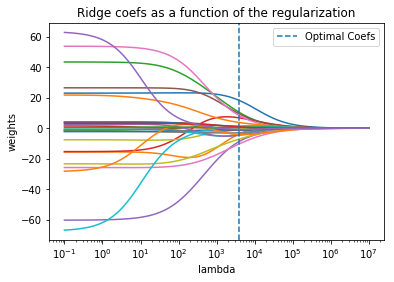

In [26]:
# Plot coef path for ridge
lambdas_ridge = np.logspace(-1, 7, 100)
coefs_ridge = []

for lambda_ridge in lambdas_ridge:
    lm_ridge.set_params(alpha=lambda_ridge)
    lm_ridge.fit(X_train, y_train)
    coefs_ridge.append(lm_ridge.coef_)
    
ax = plt.gca()
ax.plot(lambdas_ridge, coefs_ridge)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefs as a function of the regularization')

optimal_line = plt.axvline(x=lambda_ridge_optimal, linestyle='--')
plt.legend([optimal_line], ['Optimal Coefs'])

plt.show()

/Users/liyanxu/VirtualEnv/playground/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


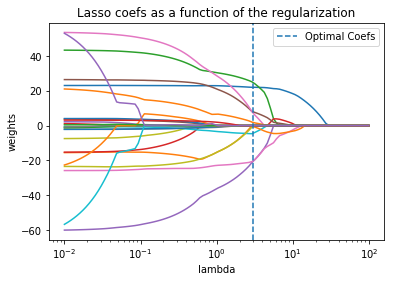

In [27]:
# Plot coef path for lasso
lambdas_lasso = np.logspace(-2, 2, 100)
lambdas_lasso, coefs_lasso, _ = linear_model.lasso_path(X_train, y_train, alphas=lambdas_lasso)

ax = plt.gca()
ax.plot(lambdas_lasso, coefs_lasso.T)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefs as a function of the regularization')

optimal_line = plt.axvline(x=lambda_lasso_optimal, linestyle='--')
plt.legend([optimal_line], ['Optimal Coefs'])

plt.show()

#### f. What are 3 observations you can draw from looking at the coefficient path plots, and the metrics? This should be different from your observations from (b) and (d).

1. ?
2. ?
3. ?

## 3. Predicting Appliance Energy Usage using SGD

#### a. Implement elastic net regression using stochastic gradient descent. As a reminder, the optimization problem is: $$min f_{o}(x) = \dfrac{1}{2N}\Vert y−Xβ\Vert ^{2}_{2} +λ(α\Vert β\Vert ^{2}_{2} +(1−α)\Vertβ\Vert_{1}), 0≤α≤1$$ You will want to derive the update for a single training sample. As a hint, you will want to consider proximal gradient descent for the $\Vertβ\Vert_{1}$ portion of the objective function. Your implementation should allow the user to specify the regularization parameters (λ, α), the learning rate (η) and the mini-batch size (n ∈ [1,N]).

In [28]:
# Define loss function w/ elastic net
def calc_loss_w_elastic_net(X, y, w, lambda_, alpha):
    # Exclude intercept term from regularization
    def calc_l2_squared(V):
        return np.sum((V[1:])**2)
    def calc_l1(V):
        return np.linalg.norm(V[1:], ord=1)
    
    return (calc_l2_squared(y - X.dot(w)) / (2 * y.shape[0]))\
            + lambda_ * (alpha * calc_l2_squared(w)\
            + (1 - alpha) * calc_l1(w))

In [29]:
# Define gradient for loss function w/ ridge regularization
def calc_gradient_w_ridge(X, y, w, coef_ridge):
    d_ridge = 2 * coef_ridge * w
    d_ridge[0] = 0    # Exclude intercept term from ridge regularization
    return X.T.dot(X.dot(w) - y) / y.shape[0] + d_ridge

In [30]:
# Define proximal operator for lasso
def calc_proximal_w_lasso(V, coef_lasso, learning_rate):
    threshold = coef_lasso * learning_rate
    def calc_proximal_mapping(el):
        if el >= threshold:
            return el - threshold
        elif el <= -threshold:
            return el + threshold
        else:
            return 0
        
    return np.array([calc_proximal_mapping(el) for el in np.nditer(V)])

In [35]:
# Define gradient descent for elastic net
# Assume X has intercept column and is standardized
def train_w_elastic_net(X, y, w, lambda_, alpha, learning_rate, batch_size, epochs, track_loss):
    coef_ridge = lambda_ * alpha
    coef_lasso = lambda_ * (1 - alpha)
    losses = []
    idx_mask = np.arange(y.shape[0])
    
    for epoch in range(epochs):
        np.random.shuffle(idx_mask)
        X = X[idx_mask]
        y = y[idx_mask]
        for i in range(0, y.shape[0], batch_size):
            X_tmp = X[i:i+batch_size]
            y_tmp = y[i:i+batch_size]
            w = w - learning_rate * calc_gradient_w_ridge(X_tmp, y_tmp, w, coef_ridge)
            w_intercept = w[0]    # Exclude intercept term from lasso regularization
            w = calc_proximal_w_lasso(w, coef_lasso, learning_rate)
            w[0] = w_intercept
        if track_loss:
            losses.append(calc_loss_w_elastic_net(X, y, w, lambda_, alpha))
    
    if track_loss:
        return losses

#### b. For the optimal regularization parameters from ridge $λ_{ridge}$ and lasso $λ_{lasso}$, and $α = \dfrac{1}{2}$, what are good learning rates for the dataset? Justify the selection by trying various learning rates and illustrating the objective value $(f_{o}(x))$ on a graph for a range of epochs (one epoch = one pass through the training data). For the chosen learning rates (ridge and lasso may have different values), what are the RMSE and R2 for the elastic net model trained on the entire training set on the training, validation, and test sets?

In [36]:
# Prepare data
X_train_itcpt = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_valid_itcpt = np.hstack((np.ones((X_valid.shape[0], 1)), X_valid))
X_test_itcpt = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

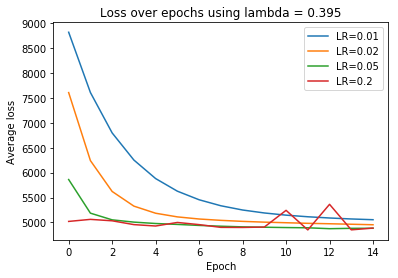

In [39]:
# Try learning rates with optimal lambda of ridge
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.5
#lambda_ = 0.395
lambda_ = 0
learning_rates = [0.01, 0.02, 0.05, 0.2]
batch_size = 500
epochs = 15
losses_w_learning_rate = [train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, True)
                         for learning_rate in learning_rates]

ax = plt.gca()
lineObjects_ridge_lambda = ax.plot(list(range(epochs)), np.array(losses_w_learning_rate).T)
plt.xlabel('Epoch')
plt.ylabel('Average loss')
plt.title('Loss over epochs using lambda = 0.395')
ax.legend(lineObjects_ridge_lambda, ['LR=0.01', 'LR=0.02', 'LR=0.05', 'LR=0.2'])

plt.show()

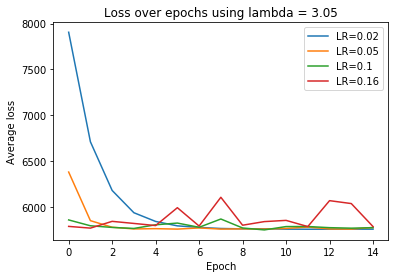

In [41]:
# Try learning rates with optimal lambda of lasso
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.5
lambda_ = 3.05
learning_rates = [0.02, 0.05, 0.1, 0.16]
batch_size = 500
epochs = 15
losses_w_learning_rate = [train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, True)
                         for learning_rate in learning_rates]

ax = plt.gca()
lineObjects_lasso_lambda = ax.plot(list(range(epochs)), np.array(losses_w_learning_rate).T)
plt.xlabel('Epoch')
plt.ylabel('Average loss')
plt.title('Loss over epochs using lambda = 3.05')
ax.legend(lineObjects_lasso_lambda, ['LR=0.02', 'LR=0.05', 'LR=0.1', 'LR=0.16'])

plt.show()

From the two plots, we can see that:
* The good learning rate is **0.05** when $\lambda = 0.395$, with fast and stable convergence.
* The good learning rate is **0.1** when $\lambda = 3.05$, with fast and stable convergence.

In [42]:
# Define RMSE and R2 with w as input
def rmse_with_w(X, y, w):
    return np.sqrt(np.sum((X.dot(w) - y)**2) / y.shape[0])

def r_squared_with_w(X, y, w):
    return 1 - np.sum((y - X.dot(w))**2) / np.sum((y - np.mean(y))**2)

In [43]:
# Convenient function to compute scores
def compute_scores(w):
    rmse_train = rmse_with_w(X_train_itcpt, y_train, w)
    rmse_valid = rmse_with_w(X_valid_itcpt, y_valid, w)
    rmse_test = rmse_with_w(X_test_itcpt, y_test, w)
    r2_train = r_squared_with_w(X_train_itcpt, y_train, w)
    r2_valid = r_squared_with_w(X_valid_itcpt, y_valid, w)
    r2_test = r_squared_with_w(X_test_itcpt, y_test, w)
    return pd.DataFrame([[rmse_train, r2_train],
                        [rmse_valid, r2_valid],
                        [rmse_test, r2_test]],
                        ['Train', 'Validation', 'Test'],
                        ['RMSE', 'R Squared'])

In [44]:
# Show RMSE and R2 when lambda = 0.395 and learning rate is 0.05
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.5
lambda_ = 0.395
learning_rate = 0.05
batch_size = 500
epochs = 15
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.909215,-0.818810
Validation,135.849472,-0.934795
Test,122.792203,-0.825865


In [45]:
# Show RMSE and R2 when lambda = 3.05 and learning rate is 0.1
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.5
lambda_ = 3.05
learning_rate = 0.1
batch_size = 500
epochs = 15
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.442560,-0.807273
Validation,135.067967,-0.912598
Test,122.197278,-0.808215


#### c. Using the learning rate from the previous part, train elastic net (using only training data) for different values of α (it should encompass the entire range and include α = 0,1). Report the RMSE and R2 for the models on training, validation, and test set.

In [46]:
# learning rate = 0.1 and lambda = 3.05, alpha = 0
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0
lambda_ = 3.05
learning_rate = 0.1
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

print(w)
compute_scores(w)

[0.91261735 0.42469666 0.31067268 0.30303675 0.51294818 0.6054345
 0.40600775 0.53760913 0.11713456 0.48987775 0.51940656 0.1538195
 0.1404472  0.23617664 0.5029402  0.74473262 0.9702999  0.43956961
 0.55468207 0.22338102 0.14926548 0.48478355 0.69551918 0.25371398
 0.36201273 0.69646518]


,RMSE,R Squared
Train,146.255860,-0.802668
Validation,133.975735,-0.881791
Test,121.686950,-0.793143


In [47]:
# learning rate = 0.1 and lambda = 3.05, alpha = 0.33
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.33
lambda_ = 3.05
learning_rate = 0.1
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.682307,-0.813196
Validation,134.295840,-0.890794
Test,120.345792,-0.753835


In [48]:
# learning rate = 0.1 and lambda = 3.05, alpha = 0.66
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.66
lambda_ = 3.05
learning_rate = 0.1
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.486588,-0.808360
Validation,134.344611,-0.892167
Test,120.959178,-0.771759


In [49]:
# learning rate = 0.1 and lambda = 3.05, alpha = 1
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 1
lambda_ = 3.05
learning_rate = 0.1
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.391899,-0.806023
Validation,133.136843,-0.858299
Test,119.203441,-0.720698


In [50]:
# learning rate = 0.05 and lambda = 0.395, alpha = 0
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0
lambda_ = 0.395
learning_rate = 0.05
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.635146,-0.812030
Validation,132.532982,-0.841480
Test,117.074276,-0.659778


In [51]:
# learning rate = 0.05 and lambda = 0.395, alpha = 0.33
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.33
lambda_ = 0.395
learning_rate = 0.05
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.350919,-0.805012
Validation,135.077089,-0.912857
Test,123.125263,-0.835783


In [52]:
# learning rate = 0.05 and lambda = 0.395, alpha = 0.66
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.66
lambda_ = 0.395
learning_rate = 0.05
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.494360,-0.808552
Validation,135.139401,-0.914622
Test,122.942708,-0.830343


In [53]:
# learning rate = 0.05 and lambda = 0.395, alpha = 1
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 1
lambda_ = 0.395
learning_rate = 0.05
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, batch_size, epochs, False)

compute_scores(w)

,RMSE,R Squared
Train,146.520155,-0.809189
Validation,132.377342,-0.837157
Test,117.654187,-0.676261


In [55]:
# Debug: lambda = 0 (linear regression without regularization)
w = np.random.rand(X_train_itcpt.shape[1])
alpha = 0.5
lambda_ = 0
learning_rate = 0.05
train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, alpha, learning_rate, 500, 30, False)

compute_scores(w)

,RMSE,R Squared
Train,146.750688,-0.814886
Validation,135.033626,-0.911626
Test,121.954362,-0.801033


#### d. Based on the results from (c) and 2(a) and 2(c), what conclusions can you draw in terms of RMSE and R2? Which model is the best? Also discuss the differences between the SGD-variants of Ridge and LASSO and the standard implementations (Problem 2).

The score tables from (c) have huge difference compared with those from 2(a) and 2(c).

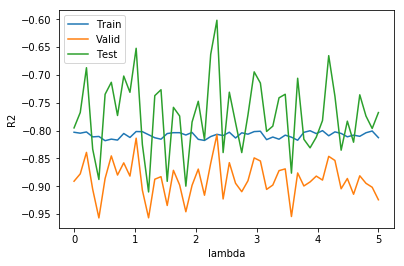

In [56]:
rmses = []
r2s = []
lambdas = np.linspace(0, 5, 50)
for lambda_ in lambdas:
    w = np.random.rand(X_train_itcpt.shape[1])
    train_w_elastic_net(X_train_itcpt, y_train, w, lambda_, 0, 0.05, 500, 30, False)
    rmses.append([rmse_with_w(X_train_itcpt, y_train, w),
                 rmse_with_w(X_valid_itcpt, y_valid, w),
                 rmse_with_w(X_test_itcpt, y_test, w)])
    r2s.append([r_squared_with_w(X_train_itcpt, y_train, w),
                r_squared_with_w(X_valid_itcpt, y_valid, w),
                r_squared_with_w(X_test_itcpt, y_test, w)])

ax = plt.gca()
lineObjects = ax.plot(lambdas, r2s)
plt.xlabel('lambda')
plt.ylabel('R2')
ax.legend(lineObjects, ['Train', 'Valid', 'Test'])

plt.show()